# Deutsch_Jozsa algorithm
This file will be present with these following contents
- The explanation of D-J algorithm in detaills
- Implement and explain a simple example with python coding
- Generate the codes for different oracle and n bit input

### Problem we need to solve:

Given a function $f(x)$ which is either balanced or constant with n bit inputs **x** and one output y
\begin{align*}
f(\{x_0, x_1, x_2, ...\}) \rightarrow 0 \textrm{ or } 1 \textrm{ , where } x_n \textrm{ is } 0 \textrm{ or } 1 
\end{align*}
A constant function returns all 's or all 's for any input, while a balanced function returns 's for exactly half of all inputs and 's for the other half.
**How to determine the type of the function is balanced or constant?**


### Classical solution
$2^n$ inputs from 0 to $2^n -1$ we can try.

In order to get a determined result we should at least test $2^{n-1}+1$ times for different inputs. 
($2^n / 2$ tests have same result, add one more to determine it's balanced or not)

### Quantum Solution

1. Prepare two quantum registers. The first is an **n**-qubit register initialized to $\vert0\rangle$ , and the second is a one-qubit register initialized to$\vert1\rangle$ :
\begin{align*}\vert \psi_0 \rangle = \vert0\rangle^{\otimes n} \vert 1\rangle\end{align*}
2. Apply a Hadamard gate to each qubit:
\begin{align*}\vert \psi_1 \rangle = \frac{1}{\sqrt{2^{n+1}}}\sum_{x=0}^{2^n-1} \vert x\rangle \left (|0\rangle - |1 \rangle \right)\end{align*}
As we know that hadamard gate can turn each state $\vert0\rangle$ into two parts $\frac{\vert0\rangle + \vert1\rangle}{\sqrt{2}}$ 

3. Apply the quantum$\vert x\rangle \vert y\rangle$ oracle to $\vert x\rangle \vert y\oplus f(x)\rangle$ :
\begin{align*}
|\psi_2 \rangle & = \frac {1}{\sqrt {2^{n+1}}}\sum_{x=0}^{2^n - 1} |x\rangle (|f(x)\rangle - |1 \oplus f(x)\rangle) \\
& = \frac {1}{\sqrt {2^{n+1}}} \sum_{x=0}^{2^n-1}(-1)^{f(x)}|x\rangle (|0\rangle - |1\rangle)
\end{align*}
since for each $x, f(x)$  is either 0 or 1.

4. At this point the second single qubit register may be ignored. Apply a Hadamard gate to each qubit in the first register:
\begin{align*}
\begin{aligned}
|\psi_3 \rangle &= \frac{1}{2^n}\sum_{x=0}^{2^n-1}(-1)^{f(x)} \left[ \sum_{y=0}^{2^n-1}(-1)^{x \cdot y} |y \rangle \right] \\
&= \frac{1}{2^n}\sum_{y=0}^{2^n-1} \left[ \sum_{x=0}^{2^n-1}(-1)^{f(x)} (-1)^{x \cdot y} \right] |y \rangle
\end{aligned}
\end{align*}
where $ x \cdot y = x_0y_0 \oplus x_1y_1 \oplus \ldots \oplus x_{n-1} y_{n-1}$
 is the sum of the bitwise product
 
### The most difficult part to understand is here: 
    
**how we understand the sign of ${(-1)}^{x \cdot y}$** 

**the $2^n$ bitstring 0 turn into $2^n$ potential states (each state contains $2^n$ bitstring) after being applied by H gate, then we apply another H-gate after an oracle, which means for each potential states will get another $2^n$ potential states, consequently we obtain $2^n$*$2^n$(corresponding to the two sum of the equation) potential states, but there some same states can be sum up, so eventually we have $2^n$ possible states.**

**From the second H-gate, we observe that each potential state x will generate $2^n$ different y. We will have the y with (-1), if and only if x has (-1) and y has (-1) in the same K-th place of bitstring(cuz we only get (-1) in $\vert1\rangle$ from $\vert1\rangle$ applied by H-gate), globally we need impair case like this, Which it corresponds the formulation $ x \cdot y = x_0y_0 \oplus x_1y_1 \oplus \ldots \oplus x_{n-1} y_{n-1}$ (we only get 1 when $x_k$ and $y_k$ both equal 1, after sum we got 0 if that case is pair, otherwise 1)**
 
 5. Measure the first register. Notice that the probability of measuring $\vert 0 \rangle ^{\otimes n} = \lvert \frac {1}{2^n}\sum_{x=0}^{2^n-1}(-1)^{f (x)} \rvert^2$, which evaluates to 0 if $f(x)$ is constant and 1 if $f(x)$ is balanced.

### Let's start with a simple example in which we have 3-bit input string 

In [10]:
# set the length of the n-bit input string. 
n = 3

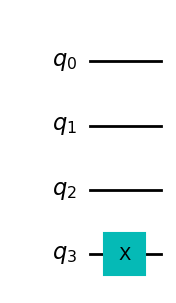

In [11]:
const_oracle = QuantumCircuit(n+1)

output = np.random.randint(2)
if output == 1:
    const_oracle.x(n)

const_oracle.draw()

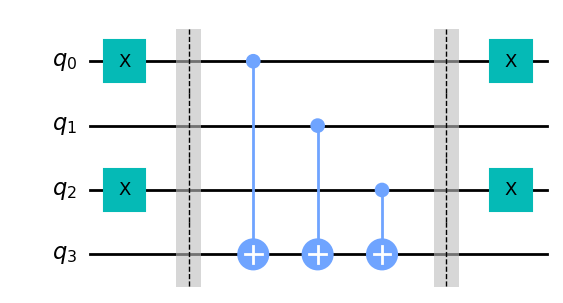

In [12]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Use barrier as divider
balanced_oracle.barrier()

# Controlled-NOT gates
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Show oracle
balanced_oracle.draw()

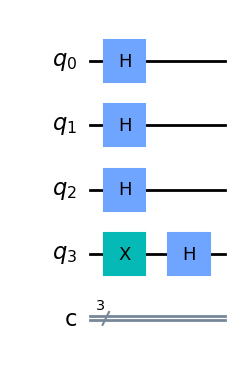

In [32]:
#initialize inputs and output of deutsch jozsa circuit
dj_circuit = QuantumCircuit(n+1,n)

#apply H-gate for each input
for qubit in range(n):
    dj_circuit.h(qubit)
#apply x-gate and H for output, assign |-> to output
dj_circuit.x(n)
dj_circuit.h(n)

dj_circuit.draw()

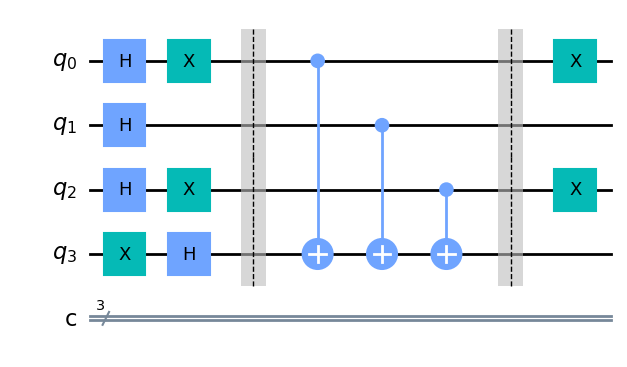

In [33]:
dj_circuit = dj_circuit.compose(balanced_oracle)
dj_circuit.draw()

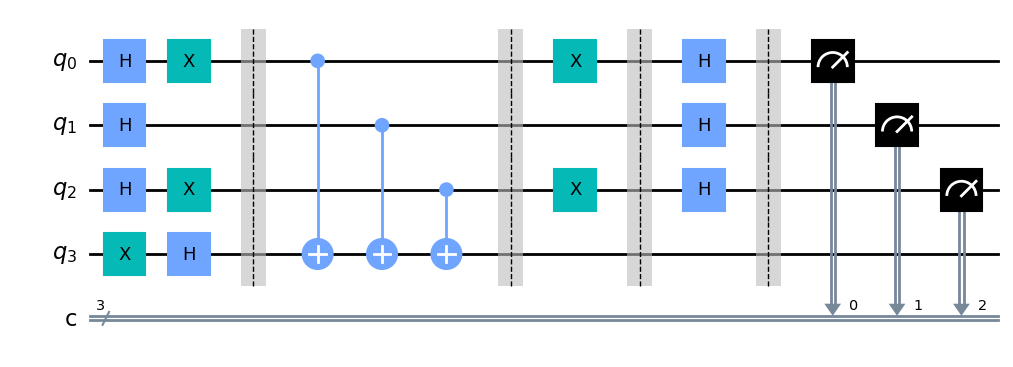

In [34]:
dj_circuit.barrier()
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()
## mesure the result
for i in range(n):
    dj_circuit.measure(i,i)
    
dj_circuit.draw()

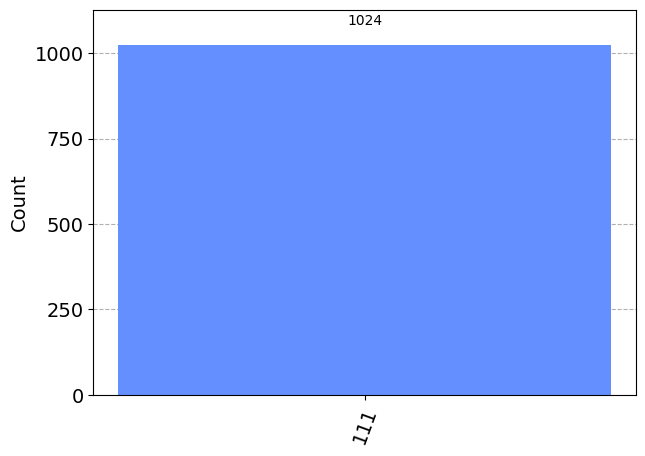

In [35]:
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
results = aer_sim.run(dj_circuit).result()
counts = results.get_counts()

plot_histogram(counts)

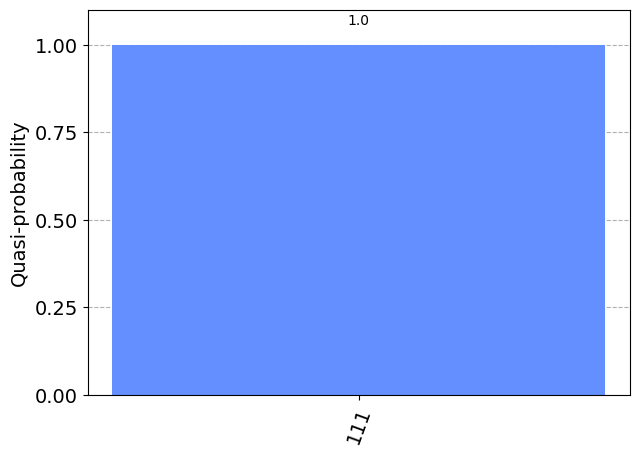

In [47]:
# Calculate the total number of shots
total_shots = sum(counts.values())

# Calculate probabilities
probabilities = {state: count / total_shots for state, count in counts.items()}

# Plot the probabilities
plot_histogram(probabilities)


In [46]:
# Determine if the function is constant or balanced
is_constant = counts.get("000",0) == 1
outcome = "Constant" if is_constant else "Balanced"

# Plot histogram with annotation
plot_histogram(counts, title=f"Deutsch-Jozsa Outcome: {outcome}")

# Print summary
print(f"The function is determined to be {outcome}.")

The function is determined to be Balanced.


## Generalized Circuits

In [8]:
def dj_oracle(case, n):
    # We need to make a QuantumCircuit object to return
    # This circuit has n+1 qubits: the size of the input,
    # plus one output qubit
    oracle_qc = QuantumCircuit(n+1)
    
    # First, let's deal with the case in which oracle is balanced
    if case == "balanced":
        # First generate a random number that tells us which CNOTs to
        # wrap in X-gates:
        b = np.random.randint(1,2**n)
        # Next, format 'b' as a binary string of length 'n', padded with zeros:
        b_str = format(b, '0'+str(n)+'b')
        # Next, we place the first X-gates. Each digit in our binary string 
        # corresponds to a qubit, if the digit is 0, we do nothing, if it's 1
        # we apply an X-gate to that qubit:
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)
        # Do the controlled-NOT gates for each qubit, using the output qubit 
        # as the target:
        for qubit in range(n):
            oracle_qc.cx(qubit, n)
        # Next, place the final X-gates
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)

    # Case in which oracle is constant
    if case == "constant":
        # First decide what the fixed output of the oracle will be
        # (either always 0 or always 1)
        output = np.random.randint(2)
        if output == 1:
            oracle_qc.x(n)
    
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle" # To show when we display the circuit
    return oracle_gate

In [9]:
def dj_algorithm(oracle, n):
    dj_circuit = QuantumCircuit(n+1, n)
    # Set up the output qubit:
    dj_circuit.x(n)
    dj_circuit.h(n)
    # And set up the input register:
    for qubit in range(n):
        dj_circuit.h(qubit)
    # Let's append the oracle gate to our circuit:
    dj_circuit.append(oracle, range(n+1))
    # Finally, perform the H-gates again and measure:
    for qubit in range(n):
        dj_circuit.h(qubit)
    
    for i in range(n):
        dj_circuit.measure(i, i)
    
    return dj_circuit

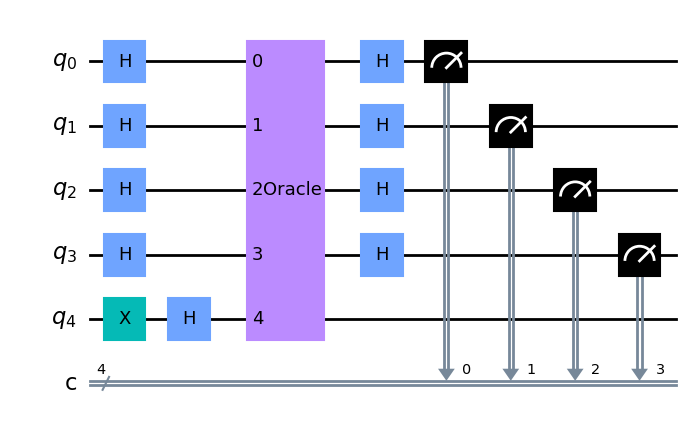

In [10]:
n = 4
oracle_gate = dj_oracle('balanced', n)
dj_circuit = dj_algorithm(oracle_gate, n)
dj_circuit.draw()

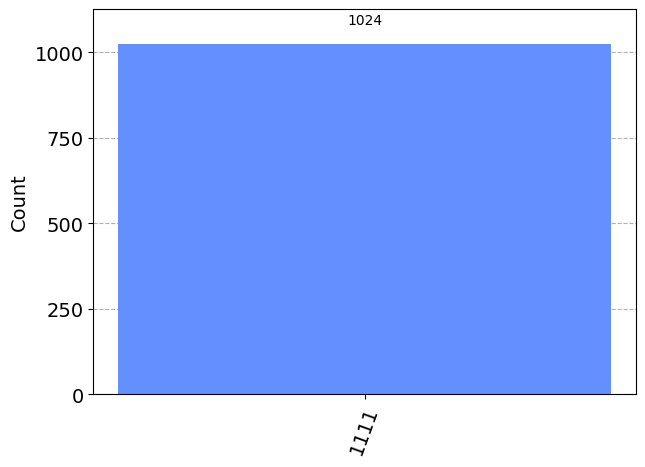

In [13]:
aer_sim = Aer.get_backend('aer_simulator')
transpiled_dj_circuit = transpile(dj_circuit, aer_sim)
results = aer_sim.run(transpiled_dj_circuit).result()
answer = results.get_counts()
plot_histogram(answer)

**As the result, the probility of 0000 is  0% so it's a balanced circuit**

In [16]:
from qiskit_textbook.problems import dj_problem_oracle
oracle = dj_problem_oracle(1)
##I can not import that package for some raisons

Traceback (most recent call last):
  Cell In[16], line 1
    from qiskit_textbook.problems import dj_problem_oracle
ModuleNotFoundError: No module named 'qiskit_textbook'

Use %tb to get the full traceback.
